**DOCUMENT ONE**

# Background of the Problem

According to ABS (2021), housing continues to be Australia's largest asset class, worth approximately $7.7 trillion, and yet, the study of real estate sentiment in Australia has been profoundly under-researched to date (Nanda & Heinig, 2018). Conversely, current literature reviews have established a strong connection between investor sentiment and stock returns in general, which in turn would suggest that there is also some degree of correlation between real estate sentiment and the strength of the property market as well (Bisen, 2020; Bharathi & Geetha, 2017; Corredor, Ferrer & Santamaria, 2011). In view of these findings, it was clear that there existed an opportunity to exploit this underutilisation in real estate sentiment within Australia to gain a competitive edge in estimating where and when to invest in housing in Australia.

As such, this Project aims to autonomously estimate the relative strengths of the property market across all states and territories in Australia, as a function of time, by relying on trusted Australian news sources.

# The Proposed Solution

The first component in the data ingestion architecture involved identifying the news article addresses of interest from all pages contained within the trusted news source websites. The decision was made to include news articles from all available pages on the trusted news source websites in order to afford more power to the models that formed part of the solution.

These website addresses were collected using the second component of the solution, which consisted of a web crawler powered by the *Selenium* package. Once the web crawler had extracted all of the news article website addresses from the trusted news sources, the web crawler would then also extract the title, publication date, body content, and any other relevant data, for each of the website addresses collected previously. 

The third component involved the natural language processing (NLP) pipeline. The first NLP task in this pipeline involved the implementation of Named Entity Recognition (NER) to identify all locations (LOCs) and geopolitical entities (GPEs) from the body text of each news article. This LOC and GPE data would then be rolled up to the state and territory level using the *Nominatom* geocoding software in order to achieve consistent data granularity for comparison purposes. The second NLP task involved testing a variety of traditional machine learning methods to perform sentinment analysis on sentences of the news article body text containing the identified LOCs and GPEs. Subsequent to the validation process, the best sentiment predictor would be selected for application.

The output from the NLP pipeline served as scoring weights to the frequency of published news articles per state or territory. For example, if all news article mentions of Queensland for a given week were negative and all mentions of New South Wales were positive, this would leave a -1 score for Queensland and a +1 score for New South Wales for that week. The relative scoring across all states and territories over time provided an estimate of the relative strength of the property market across all states and territories in Australia. These scores were then plotted as a function of time, however, an online dashboard of the results was not produced and instead kept as a future recommendation.

Publications and communications of project developments for this Project were executed using Github. 

# References

(Nanda & Heinig, 2018) - http://centaur.reading.ac.uk/72893/1/170930_Revised_Manuscript.pdf

(ABS, 2021) - https://www.abs.gov.au/statistics/economy/price-indexes-and-inflation/residential-property-price-indexes-eight-capital-cities/latest-release#:~:text=last%20twelve%20months.-,Total%20value%20of%20the%20dwelling%20stock,rose%20by%2044%2C100%20to%2010%2C602%2C700.

(Corredor, Ferrer & Santamaria, 2011) - https://www.researchgate.net/publication/228318309_Investor_Sentiment_Effect_in_Stock_Markets_Stock_Characteristics_or_Country-Specific_Factors

(Bisen, 2020) - https://medium.com/vsinghbisen/how-sentiment-analysis-in-stock-market-used-for-right-prediction-5c1bfe64c233

(Bharathi & Geetha, 2017) - https://www.researchgate.net/publication/317214679_Sentiment_Analysis_for_Effective_Stock_Market_Prediction

**DOCUMENT TWO**

# Website Selection

## Website Selection Justification

Only trusted Australian news sources were considered, which meant first examining their machinery of care, transparency, expertise and agenda (Caulfield, 2017). Furthermore, only news sources which provided publicly available data and consent for web crawling their data were pursued in order to remain ethical. The combination of these two factors significantly limited the pool of Australian news source candidates to consume to just one: https://www.onthehouse.com.au. Hence, the selected website for this Project was https://www.onthehouse.com.au. In terms of the layout of this website, each news article was displayed as a single block on the page and there were 136 property news pages at the time of this study.

## Base Data Required

The base data required for predicting the relative strengths of the property market across all states and territories in Australia, as a function of time, was deemed to comprise of the publication date and entire body text of each property news article. Returning the entire body text allowed for the identification of all GPE and LOC data present as an input to the sentiment analysis and returning the publication date allowed for tracking of these sentiments over time.

## Data Supplementation

The base data was supplemented by also extracting the title of the news article and the tags available on most articles, which listed the states and territories discussed in the article. The title was acquired in order to obtain as much context about the news article as possible for further analysis. Moreover, the tags were acquired to act as the true labels for validating the Named Entity Recognition (NER) and geocoding models in the NLP pipeline. While these place tags did exist, it was discovered that a significant number of these tags were missing from various property news articles as detailed further in the Exploratory Data Analysis (EDA) section of this Report. This finding further underlined the necessity to incorporate the NER and geocoding models into the proposed NLP pipeline.  

## Ethics of Data Extraction

Consent for web crawling the data on this Australian news source was confirmed by consulting with the website's copyright protection notice and the robots.txt file found at the root of the website. While this website did not openly acknowledge previously allowed web scraping, the only disallow directive present in the robots.txt file was for any data under https://www.onthehouse.com.au/real-estate-agents, however, all relevant data for this Project was contained under https://www.onthehouse.com.au/news instead. Furthermore, all of the relevant data was not behind any kind of walled garden, pay or otherwise, which specified that it was publicly available data.

# Description of Web Crawler Workflow

A class was used to house all of the functions that comprised the web crawler application. This decision to utilise object-oriented programming (OOP) was made as it increased scalability, maintainability and reusuability of the code (Python Software Foundation, 2021). The web crawler class comprised of the following distinct components:
- **Load necessary Python libraries**: the *selenium* package was loaded in order to automate web browser interactions from Python. Examples of required web browser interactions included launching a browser, extracting text from HTML elements found across different websites, clicking through different pages of the website and closing the browser. Additionally, the *pandas* package was loaded to enable the storage of extracted data as DataFrame objects for data manipulation further downstream. Moreover, the *datetime* package was loaded in order to save the web crawler extraction date in the extracted data outputs for tracking purposes.
- **Launch browser and open website**: the *ChromeDriver* was executed during the initialisation of the web crawler class to launch the Google Chrome web browser. It was then possible to execute a *Selenium* script to open the *onthehouse* website from there. The *ChromeDriver* was chosen over the *FirefoxDriver* as Google Chrome accounted for approximately 65% of the browser market share, and so it was more likely that most of the visitors to the *onthehouse* website used Google Chrome (Statcounter, 2021).
- **Obtain and store relevant URL addresses**: before the text corpus and other relevant data could be extracted, a list of URL addresses leading to these property news articles were first extracted from the title listings on the home pages using a *Selenium* script. Obtaining these URL addresses made it easier to navigate to the relevant property news articles on the website. The *get_URLs()* function in the class performed this task. This list of URL addresses was then stored as a CSV file to provide transparency on where the web crawler would extract data from later on. Further details regarding the web navigation process and the data extraction process involved can be found in the subsequent section. 
- **Extract and store relevant news data**: looping through each of the URL addresses collected earlier, each website was individually opened and from this point, the title, date, body text, and tags were then extracted using a *Selenium* script under the *get_Content()* function in the class. All of the extracted data was then stored as a CSV file so that the NLP pipeline could be applied to the data without having to re-run the web crawler application.
- **Quite driver**: once the relevant data was collected and stored successfully, the browser was closed and the *ChromeDriver* session was terminated.

# Data Extraction, Collection Method and Description of Corpus

## Data Extraction and Collection Method

After the initialisation of the web crawler class, the *run* method was the first to be executed. This method linked the *get_URLs()* method with the *get_Content()* method by feeding the output list of URL addresses as an input for extracting the base and supplementary data. 

One of the functionalities of the *get_URLs()* method was to control the navigation process through the *onthehouse* website. This was achieved by exploiting the HTML element for the *next page* button using the XPath tool. XPath was chosen for this task as it allowed for easy, readable and direct access to the relevant HTML element without having to go through the entire HTML tree (Datafiniti, 2014; Sahin, 2019). 

At the time of this study, the chosen website contained 136 pages of property news articles to navigate through, and the data from all of these website addresses were needed as it was deemed important to afford more power to the NLP models. This max page count was also acquired using XPath, however, additional transformations were needed to attain the desired format. First, the inner HTML was converted to text which returned "Page 1 of 136". Subsequently, the last page was stripped from this string and converted into an integer for use within a while loop using *j* as the iterator variable. Here, the web crawler would be programmed to jump to the next page repeatedly until this max page was reached. However, a responsible time delay of two seconds was added in between page jumps to prevent any violations to the terms of service of the website (Heydt, 2018). This decision to retrieve a dynamically changing max page count was deemed important in future-proofing the web crawler.

While on each page, the *get_URLs()* method also utilised XPath to retrieve the property news block URL addresses. It was observed that there were always five property news blocks on each page. Consequently, the path expression to select the relevant nodes in the XML document incorporated iteratively changing numbers from one to five to select all of these property news blocks on the page. This was performed within a while loop that used *i* as the iterator variable. Again, a responsible time delay of two seconds was added in between extractions of each property block URL address. Once all of the URL addresses were collected, the *get_URL()* method concluded by saving the output as a CSV file and returning the URL addresses as a list.

The *run* method then iteratively fed each URL in this list of URL addresses into the *get_Content()* method using a for loop. This for loop used *k* as the iterator variable. The title, date, body and tag data were then extracted using XPath, and if any information was missing, an 'N/A' value would be returned instead. This data was then appended to an empty DataFrame, row by row. The data extraction date was also appended at this point for tracking purposes. Once again, a responsible time delay of two seconds was added in between extracting the title, date, body and tag data from the news article website.

Prior to invoking the *quite_driver()* method, the *run* method also saved the extracted data as a CSV file and returned the DataFrame.

## Description of Corpus

The final output from the web crawler was a DataFrame containing the following columns:
- **Body**: the body text of the news article as a string.
- **Data_Date**: the date that the data was extracted by the web crawler as a date object.
- **Date**: the date the news article was published as a string.
- **Tags**: the place tags listed on the news article as a string.
- **Title**: the title of the news article as a string.

The screenshot below displays the DataFrame object returned from the web crawler.

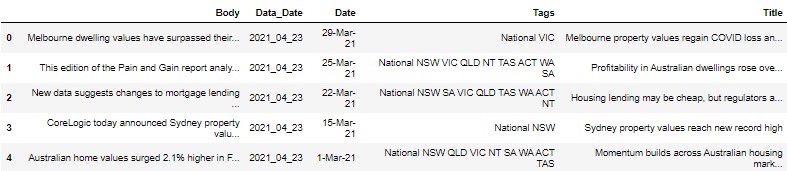

## Data Transformation

Preliminary data preprocessing was conducted on the web crawler output so that it could be ingested by the NLP pipeline downstream. This involved converting any missing values or 'N/A' strings to nan values, converting the date strings into datetime, replacing unwanted characters (i.e. *â€™*), removing excess white spaces and transforming the tag strings into a list of tags per news article.

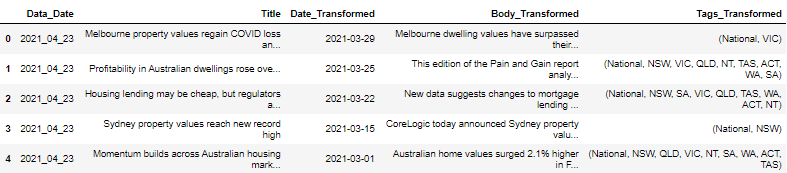

Subsequently, this DataFrame was exploded using the tags column so that the relevant sentences discussing distinct place tags could be analysed during the NLP pipeline. 

## Exploratory Data Analysis

During the EDA, it was identified that there were 1,287 rows of data in the output DataFrame. Additionally, it was found that the data extracted was dated from 2 May 2017 to 29 March 2021. Furthermore, there were no nan values within the date, body and title data, but there were 541 missing values in the tags data. The proportion of nan values against all non-nan values in the tag data is displayed in the following figure. This finding emphasisd the necessity for the inclusion of NER in the NLP pipeline to locate the place tags in the news articles.

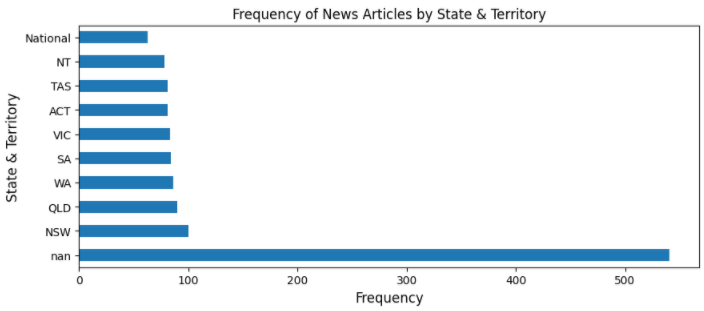

# References

(Caulfield, 2017) - https://webliteracy.pressbooks.com/chapter/what-makes-a-trustworthy-news-source/

(Statcounter, 2021) - https://gs.statcounter.com/browser-market-share

(Lewallen, 2005) - http://codebetter.com/raymondlewallen/2005/02/08/advantages-of-an-object-oriented-approach-for-new-programmers/

(onthehouse, 2021) -  https://www.onthehouse.com.au

(Datafiniti, 2014) - https://blog.datafiniti.co/building-a-web-scraper-f010a3d5f557

(Sahin, 2019) - https://www.scrapingbee.com/blog/practical-xpath-for-web-scraping/

(Python Software Foundation, 2021) - https://docs.python.org/3/tutorial/classes.html

(Heydt, 2018) - https://www.oreilly.com/library/view/python-web-scraping/9781787285217/9aca491e-81f1-4112-b1a8-1a0f00420b0c.xhtml

# Web Crawler Code with Screenshots

## Relevant Code

### Web Crawler

In [6]:
# import packages
import warnings # suppress warnings
warnings.filterwarnings('ignore') # suppress warnings
from selenium import webdriver # for opening webdriver
import time # for implementing time delays
import pandas as pd # for creating dataframes
pd.options.mode.chained_assignment = None  # to suppress SettingWithCopyWarning
from selenium.common.exceptions import NoSuchElementException # for raising exceptions
from datetime import datetime # for getting current date

# configure pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# define property news web crawler
class Property_News_Web_Crawler:
    def __init__(self):
        # open driver
        self.driver = webdriver.Chrome(r"C:\Users\Imran\Documents\chromedriver\chromedriver.exe")
        self.file_path = r'C:/Users/Imran/Desktop/Assignment_3_Repo/'
    
    def run(self):
        data = pd.DataFrame()
        for idx, url in enumerate(self.get_URLs()):
            data = data.append(self.get_Content(idx, url), ignore_index = True)
        self.quite_driver()
        data.to_csv(self.file_path + 'web_crawled_news_data.csv', index = False)
        return data
    
    def quite_driver(self):
        self.driver.quit()
        
    def get_URLs(self):
        # go to website
        self.driver.get('https://www.onthehouse.com.au/news')
        
        # extract page numbering of website
        element = self.driver.find_element_by_xpath('//*[@id="block-views-blockarticles-property-news-block-1"]/div/div/nav/li')
        page_data = element.get_attribute('innerHTML').replace("\n", "")

        # locate max page limit from page numbering and remove trailing and leading white spaces from it
        max_page_limit = int(page_data[page_data.find("of")+2:].split()[0].strip())

        # empty list for urls
        url_list = []

        # seed page number
        i = 1
        # define last page for web crawling urls
        last_page = max_page_limit
        # loop through pages
        while i < last_page:
            # seed news article number on page
            j = 1
            while j <= 5:
                print("i:", i,", j:", j)
                # extract url for news article
                URL = self.driver.find_element_by_xpath('//*[@id="block-views-blockarticles-property-news-block-1"]/div/div/div['+\
                                                   str(j)+']/a').get_attribute("href")
                # take a brief pause so that we remain a nice little web crawler for the website
                time.sleep(2)
                # append extracted url to list
                url_list.append(URL)
                # cycle to next news article on the page
                j = j + 1
            # take a brief pause so that we remain a nice little web crawler for the website
            time.sleep(2)
            i = i + 1
            # define button for going to next page once all news article urls have been scraped on this page
            next_page_button = self.driver.find_element_by_xpath("//a[@rel='next']")

            # click button to next page
            next_page_button.click()

        # convert web crawled url list to dataframe
        url_df = pd.DataFrame(list(zip(url_list)), columns = ['URL'])

        # save urls to csv (serves as a checkpoint)
        url_df.to_csv(self.file_path + 'url_list.csv', index=False)
        
        # read in csv saved previously
        return url_list
        
    # define function for web crawling property news URL
    def get_Content(self, idx, url):
        # go to website
        self.driver.get(str(url))
        
        # get news article title
        try:
            title = self.driver.find_element_by_xpath('//*[@id="block-corelogic-content"]/article/div[1]/div/h1/span').text
        # if title is missing, put N/A
        except NoSuchElementException:
            title = 'N/A'
            
        # take a brief pause so that we remain a nice little web crawler for the website
        time.sleep(2)

        # get date of news article
        try:
            date = self.driver.find_element_by_xpath("//p[@class='paragraph-active news-date']").text
        # if date is missing, put N/A
        except NoSuchElementException:
            date = 'N/A'
        # take a brief pause so that we remain a nice little web crawler for the website
        time.sleep(2)

        # get body text of news article
        try:
            body = self.driver.find_element_by_xpath("//div[@property='schema:text']").get_attribute('innerText')
        # if body is missing, put N/A
        except NoSuchElementException:
            body = 'N/A'

        # take a brief pause so that we remain a nice little web crawler for the website
        time.sleep(2)

        # get labelled location tags for article
        try:
            tags = self.driver.find_element_by_xpath("//div[@class='field_article_state']").text
        # if tag is missing, put N/A
        except NoSuchElementException:
            tags = 'N/A'
        
        # show progress of web crawler get_Content
        print("k:", idx+1)
        
        # get date of when data was web crawled
        data_date = datetime.now().strftime("%d-%m-%Y")
        
        # return values in dictionary for appending into a dataframe
        return {'Title': title, 'Date' : date, 'Body': body, 'Tags' : tags, 'Data_Date' : data_date}

In [7]:
data = Property_News_Web_Crawler().run()

i: 1 , j: 1
i: 1 , j: 2
i: 1 , j: 3
i: 1 , j: 4
i: 1 , j: 5
i: 2 , j: 1
i: 2 , j: 2
i: 2 , j: 3
i: 2 , j: 4
i: 2 , j: 5
i: 3 , j: 1
i: 3 , j: 2
i: 3 , j: 3
i: 3 , j: 4
i: 3 , j: 5
i: 4 , j: 1
i: 4 , j: 2
i: 4 , j: 3
i: 4 , j: 4
i: 4 , j: 5
i: 5 , j: 1
i: 5 , j: 2
i: 5 , j: 3
i: 5 , j: 4
i: 5 , j: 5
i: 6 , j: 1
i: 6 , j: 2
i: 6 , j: 3
i: 6 , j: 4
i: 6 , j: 5
i: 7 , j: 1
i: 7 , j: 2
i: 7 , j: 3
i: 7 , j: 4
i: 7 , j: 5
i: 8 , j: 1
i: 8 , j: 2
i: 8 , j: 3
i: 8 , j: 4
i: 8 , j: 5
i: 9 , j: 1
i: 9 , j: 2
i: 9 , j: 3
i: 9 , j: 4
i: 9 , j: 5
i: 10 , j: 1
i: 10 , j: 2
i: 10 , j: 3
i: 10 , j: 4
i: 10 , j: 5
i: 11 , j: 1
i: 11 , j: 2
i: 11 , j: 3
i: 11 , j: 4
i: 11 , j: 5
i: 12 , j: 1
i: 12 , j: 2
i: 12 , j: 3
i: 12 , j: 4
i: 12 , j: 5
i: 13 , j: 1
i: 13 , j: 2
i: 13 , j: 3
i: 13 , j: 4
i: 13 , j: 5
i: 14 , j: 1
i: 14 , j: 2
i: 14 , j: 3
i: 14 , j: 4
i: 14 , j: 5
i: 15 , j: 1
i: 15 , j: 2
i: 15 , j: 3
i: 15 , j: 4
i: 15 , j: 5
i: 16 , j: 1
i: 16 , j: 2
i: 16 , j: 3
i: 16 , j: 4
i: 16 , j: 5
i: 17

i: 125 , j: 5
i: 126 , j: 1
i: 126 , j: 2
i: 126 , j: 3
i: 126 , j: 4
i: 126 , j: 5
i: 127 , j: 1
i: 127 , j: 2
i: 127 , j: 3
i: 127 , j: 4
i: 127 , j: 5
i: 128 , j: 1
i: 128 , j: 2
i: 128 , j: 3
i: 128 , j: 4
i: 128 , j: 5
i: 129 , j: 1
i: 129 , j: 2
i: 129 , j: 3
i: 129 , j: 4
i: 129 , j: 5
i: 130 , j: 1
i: 130 , j: 2
i: 130 , j: 3
i: 130 , j: 4
i: 130 , j: 5
i: 131 , j: 1
i: 131 , j: 2
i: 131 , j: 3
i: 131 , j: 4
i: 131 , j: 5
i: 132 , j: 1
i: 132 , j: 2
i: 132 , j: 3
i: 132 , j: 4
i: 132 , j: 5
i: 133 , j: 1
i: 133 , j: 2
i: 133 , j: 3
i: 133 , j: 4
i: 133 , j: 5
i: 134 , j: 1
i: 134 , j: 2
i: 134 , j: 3
i: 134 , j: 4
i: 134 , j: 5
i: 135 , j: 1
i: 135 , j: 2
i: 135 , j: 3
i: 135 , j: 4
i: 135 , j: 5
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
k

### Preliminary Data Preprocessing

In [11]:
# read in csv saved previously
data = pd.read_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/web_crawled_news_data.csv')

In [12]:
data.head()

,Body,Data_Date,Date,Tags,Title
0,Melbourne dwelling values have surpassed their...,24-04-2021,29 Mar 2021,National VIC,Melbourne property values regain COVID loss an...
1,This edition of the Pain and Gain report analy...,24-04-2021,25 Mar 2021,National NSW VIC QLD NT TAS ACT WA SA,Profitability in Australian dwellings rose ove...
2,New data suggests changes to mortgage lending ...,24-04-2021,22 Mar 2021,National NSW SA VIC QLD TAS WA ACT NT,"Housing lending may be cheap, but regulators a..."
3,CoreLogic today announced Sydney property valu...,24-04-2021,15 Mar 2021,National NSW,Sydney property values reach new record high
4,Australian home values surged 2.1% higher in F...,24-04-2021,1 Mar 2021,National NSW QLD VIC NT SA WA ACT TAS,Momentum builds across Australian housing mark...


In [14]:
# import packages
import ast # for converting string list representation to list
import numpy as np # for working with arrays

# translate missing values to nan
data = data.replace(('*/*', '', 'nan', '0', 'N/A'), np.nan)

# transform date
def convert_to_date(x):
    date_time_obj = datetime.strptime(x, '%d %b %Y')
    return date_time_obj
data['Date_Transformed'] = data['Date'].apply(convert_to_date)

# transform body tags
# replace unwanted strings
data['Body_Transformed'] = data['Body'].str.replace(r'\n',' ', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'\xa0',' ', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€™','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€˜','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€œ','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€“','', regex=True)

# remove excess white space
data['Body_Transformed'] = data['Body_Transformed'].astype(str).apply(lambda x: ' '.join(x.split()))

# transform Tags
data['Tags_Transformed'] = data['Tags'].str.replace(r' ',"', '", regex=True)
data['Tags_Transformed'] = "'" + data['Tags_Transformed'].astype(str) + "'"
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val
data['Tags_Transformed'] = data['Tags_Transformed'].apply(literal_return)

### Exploratory Data Analysis

In [15]:
# duplicate article for each place tag listed
data_overview = data
data_overview = data_overview.explode('Tags_Transformed').reset_index(drop = True)

# check shape of data web crawled
nrow, ncol = data_overview.shape
nrow, ncol

(1287, 8)

In [16]:
# check first couple of rows in dataframe
data_overview.head()

,Body,Data_Date,Date,Tags,Title,Date_Transformed,Body_Transformed,Tags_Transformed
0,Melbourne dwelling values have surpassed their...,24-04-2021,29 Mar 2021,National VIC,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,National
1,Melbourne dwelling values have surpassed their...,24-04-2021,29 Mar 2021,National VIC,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,VIC
2,This edition of the Pain and Gain report analy...,24-04-2021,25 Mar 2021,National NSW VIC QLD NT TAS ACT WA SA,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,National
3,This edition of the Pain and Gain report analy...,24-04-2021,25 Mar 2021,National NSW VIC QLD NT TAS ACT WA SA,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,NSW
4,This edition of the Pain and Gain report analy...,24-04-2021,25 Mar 2021,National NSW VIC QLD NT TAS ACT WA SA,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,VIC


In [17]:
# check first and last publication dates
print(min(data_overview['Date_Transformed']))
print(max(data_overview['Date_Transformed']))

2017-05-02 00:00:00
2021-03-29 00:00:00


In [18]:
# check for null values
print("Nulls in 'Date'", data_overview['Date'].isnull().sum())
print("Nulls in 'Body'", data_overview['Body'].isnull().sum())
print("Nulls in 'Title'", data_overview['Title'].isnull().sum())
print("Nulls in 'Tags'", data_overview['Tags'].isnull().sum())

Nulls in 'Date' 0
Nulls in 'Body' 0
Nulls in 'Title' 0
Nulls in 'Tags' 541


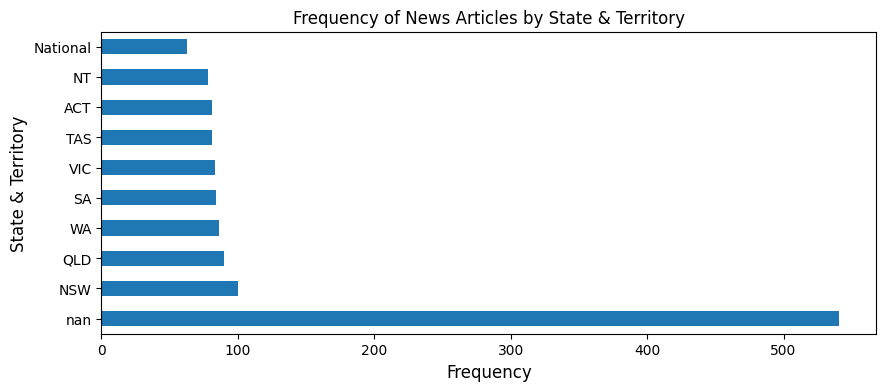

In [19]:
#import packages
import matplotlib.pyplot as plt # for plotting
from matplotlib.pyplot import figure # for plotting

# specify fig size and dpi
figure(figsize=(10, 4), dpi=100)
data_overview['Tags_Transformed'].value_counts().plot(kind='barh')
plt.title('Frequency of News Articles by State & Territory', fontsize = 12)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('State & Territory', fontsize = 12)
plt.show()

In [20]:
# select relevant columns for further processing
data2 = data[['Data_Date', 'Title', 'Date_Transformed', 'Body_Transformed', 'Tags_Transformed']]

# save transformed data for use in the NLP pipeline
data.to_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/data2.csv', index = False)

In [21]:
data2.head()

,Data_Date,Title,Date_Transformed,Body_Transformed,Tags_Transformed
0,24-04-2021,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,"(National, VIC)"
1,24-04-2021,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,"(National, NSW, VIC, QLD, NT, TAS, ACT, WA, SA)"
2,24-04-2021,"Housing lending may be cheap, but regulators a...",2021-03-22,New data suggests changes to mortgage lending ...,"(National, NSW, SA, VIC, QLD, TAS, WA, ACT, NT)"
3,24-04-2021,Sydney property values reach new record high,2021-03-15,CoreLogic today announced Sydney property valu...,"(National, NSW)"
4,24-04-2021,Momentum builds across Australian housing mark...,2021-03-01,Australian home values surged 2.1% higher in F...,"(National, NSW, QLD, VIC, NT, SA, WA, ACT, TAS)"


## Demonstration of the Web Crawler Application

The following figure demonstrates the property news web crawler opening the *onthehouse* website on the property news page.

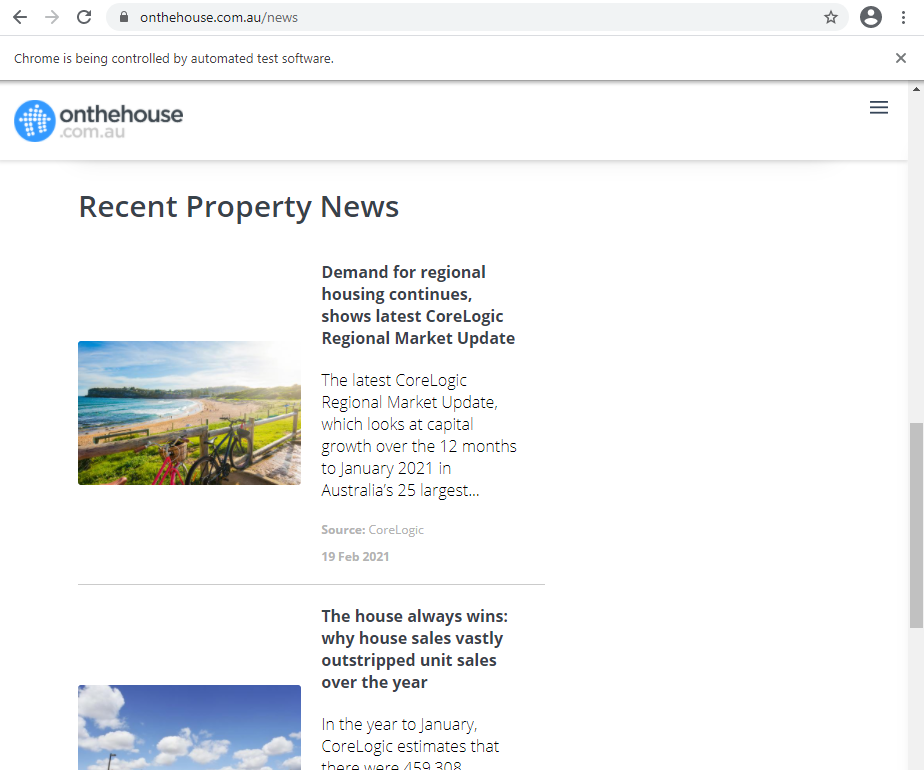

The following figure demonstrates the property news web crawler extracting the five URL addresses per page.

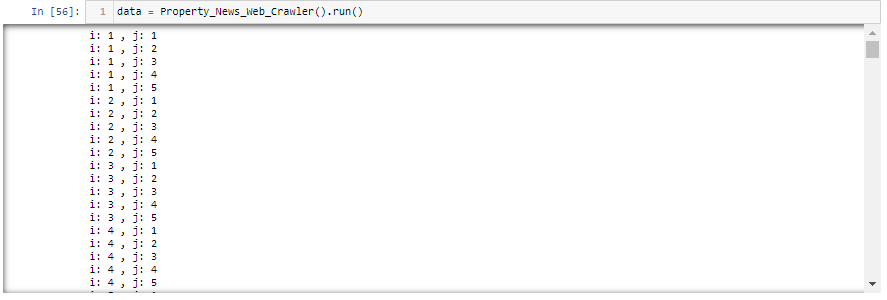

The following is a screenshot of the list of URL addresses stored as a CSV file.

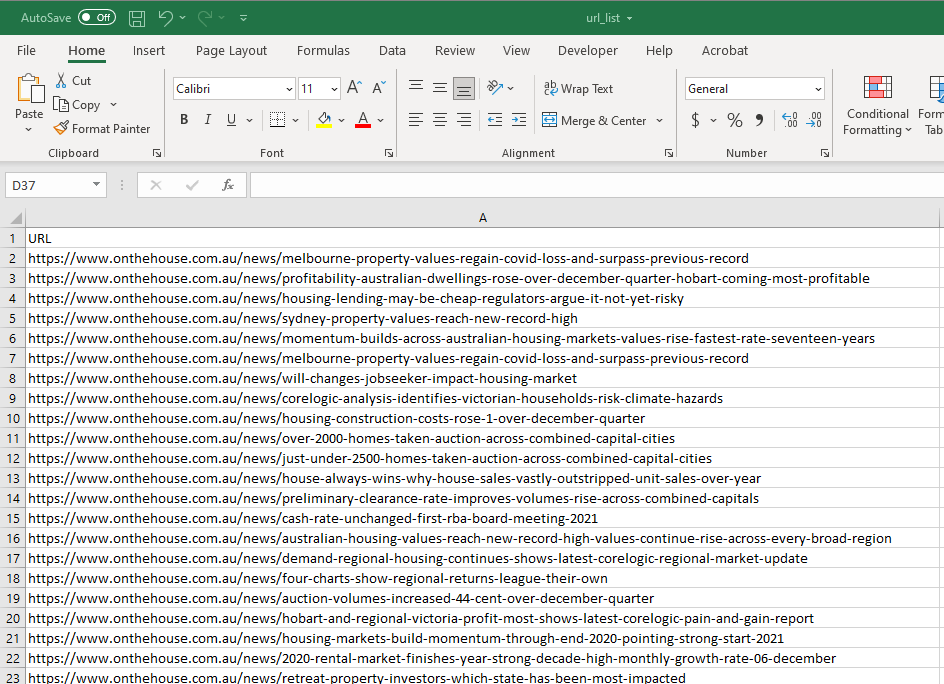

The following figure demonstrates the property news web crawler shifting towards extracting the title, date, body and tag data from each of the URL addresses collected.

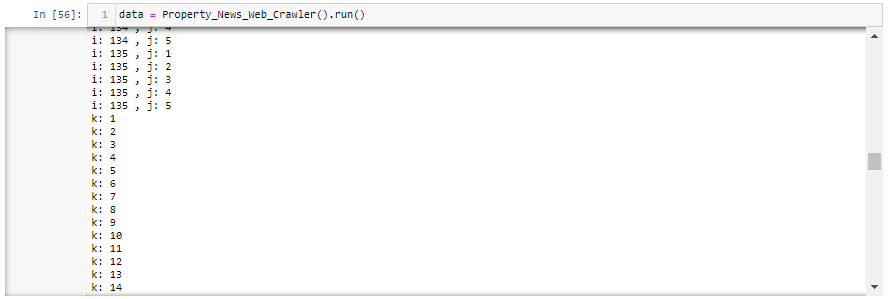

The following is a screenshot of the extracted title, date, body and tag data stored as a CSV file. It also includes the date the data was extracted.

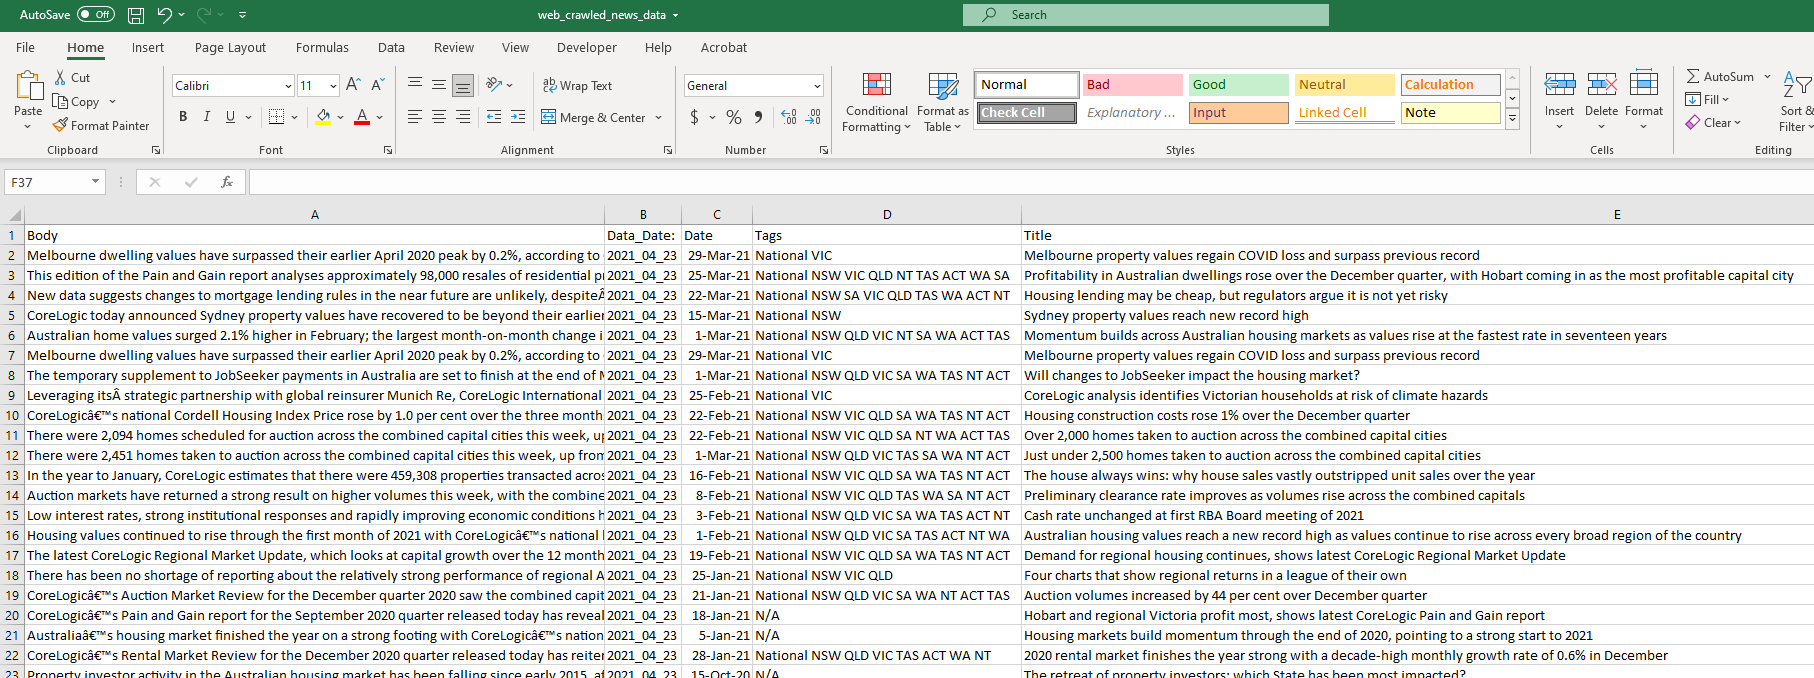

**DOCUMENT THREE**

# Named Entity Recognition

## Rational for Utilising Named Entity Recognition

As mentioned in Document Two, 541 out of 1,287 rows of extracted news data did not possess tags listing which states or territories those articles discussed. This was perceived as an issue since this data was necessary for estimating the relative strengths of the property markets across all states and territories in Australia. Hence, Named Entity Recognition (NER) was required to identify all place locations in the text corpus.

## Named Entity Recognition Literature Review

NER refers to the task of identifying key information, or entities, within a text corpus such as a location, person, organisation or time (Marshall, 2019). There exist several distinct approaches to NER which include:
- **Rule-Based**: detects entities in a text corpus if they match a list of known entities and any other hand-crafted rules. The advantage of this approach is that it does not rely on any annotated data and can demonstrate good robustness and coverage of the obtained results (Chahira et al., 2017 & GeeksforGeeks, 2020). According to current literature however, this approach has been progressively abandoned due to the high time and manual work requirements, reduced learning capacity of the system and potential existence of overly complicated patterns in the data (Chahira et al., 2017; Li et al., 2020 & Thanaki, 2017).
- **Unsupervised Learning**: uses a model previously trained through unsupervised tasks, such as masked language modelling and sentence prediction, to detect entities based on the term and the context of the sentence (Rajasekharan, 2020). The *Bidirectional Encoder Representations from Transformers* (*BERT*) model is an example of an unsupervised learning approach to NER (Horev, 2018). The advantages of the unsupervised learning approach is that it does not rely on a large amount of high-quality annotated data and can attain high accuracy on unseen data (Li et al., 2019). However, the disadvantage of this approach is that state-of-the-art model solutions that require fine-tuning can require high computational power (Hui, 2019).
- **Feature-Based Supervised Learning**: this is the most common and leading approach in NER which uses training data and their features as the input to generate a trained shallow feedforward neural network model. *Spacy's* pre-trained NER model is an example of a simple, supervised classifier (Jack, 2019). This trained model can then be used to detect similar entities in new data. The advantage of this approach is that it can attain high accuracy on unseen data (Toral, 2015). However, the disadvantage of this approach is that it relies on a large amount of high-quality annotated data (Li et al., 2019).
- **Deep-Learning**: uses multiple processing layers in a neural network to learn non-linear mappings between the input and the output via non-linear activation functions. The advantage of being able to learn complex and intricate features in this way is that the deep-learning model can remove the need for domain expertise and sophisticated feature extraction while still achieving high accuracy. That is, the model can accept raw data (Mahapatra, 2018; Maheshkar, 2020 & Vilariño, 2020). Again, the disadvantage of this approach is that it relies heavily on a large amount of high-quality annotated data and is computationally expensive to train (Vilariño, 2020).

Some of the existing challenges faced during NER, and even sentiment analysis, involve the presence of slang words, new accents and grammatical and spelling mistakes (Devi, 2020). However, published news articles are typically quality checked for these items.

## Chosen Named Entity Recognition Method

*Spacy's* pre-trained, english NER model, *en_core_web_sm*, was the selected NER model for detecting locations in the Australian news articles due to the absence of a list of all known location entities, lack of high-quality annotated data and because the location entities were deemed to be simple to identify in grammatically correct text. Furthermore, it was conceived that implementing a rule-based approach would not have been possible without this list of known location entities and that a deep-learning approach would have been excessive for this particular task. Moreover, the unsupervised learning approach was excluded as the *BERT* model would have required more than 16GB GPU memory, which exceeded the available resources of 8GB GPU memory (Hui, 2019). The following figure displays an example result of *Spacy's* NER model applied to a portion of the body text in an Australian news article.

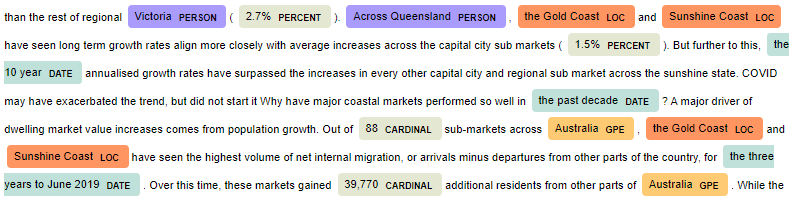

As can be seen from the above figure, *Spacy's* NER model identified different categories of key information within the body text corpus, however, the only entities of interest for this task consisted of the locations (LOCs) and geopolitical entities (GPEs). Consequently, the entities were later filtered to only include LOCs and GPEs.

Additionally, it was rendered clear from the above figure that the entities identified were not always at the state and territory level (for example, Gold Coast was a city, not a state or territory). Hence, it was deemed necessary to employ the *Nominatim* geocoding software, from within Python, to compute the full addresses from these LOC and GPE tags and then return the associated states or territories, if applicable.

## Named Entity Recognition Performance Results

In order to validate the NER method implemented, the predicted state or territory for each news article was compared with the true tag labels extracted from the *onthehouse* news article pages. Since not all of the articles contained tags, these records were removed from the comparison. Furthermore, only records predicted to include at least one of the states or territories in Australia were kept for this task. This comparison revealed that the implemented NER method possessed an accuracy of 73%. This accuracy was regarded as a good baseline to improve upon for future iterations of this NLP pipeline.

# Sentiment Analysis

## Rational for Utilising Sentiment Analysis

Polarity-based sentiment analysis was incorporated into the NLP pipeline in order to gain the necessary insights into the relative strengths of housing across all states and territories in Australia. Valence-based sentiment analysis was not actively pursued as this would have posed challenges in trialling machine learning-based approaches (Artiles, 2017).

## Sentiment Analysis Literature Review

Sentiment analysis has been used in literature to gauge the attitude of the writer towards a particular subject. This traditionally has involved predicting whether the text positively, neutrally or negatively reflects the subject (Devi, 2020). The two main approaches towards sentiment analysis consist of:

- **Lexicon-Based**: which assumes that each word in the text corpus possess an emotion and that the quantification of these emotions would be indicative of the writer's attitude towards the subject. A popular example of a lexicon-based approach includes the Valence Aware Dictionary and sEntiment Reasoner (VADER) (Artiles, 2017). The advantage of this approach is that labelled data and the procedure of training a classifier is not required. However, this approach can suffer from a recall and overall accuracy perspective (Isabelle et al., 2018).
- **Machine Learning (ML) Algorithms**: involves using a trained classifier to predict whether the text corpus positively, neutrally or negatively reflects the subject (Pajupuu, 2016). The Logistic Regression (LR) model, Support Vector Machine (SVM) model, Naive Bayes (NB) model, and even the BERT model, are traditional examples of machine learning algorithms employed for sentiment analysis tasks (Molla, 2018 & Pajupuu, 2016). The key advantage of this approach is that it has demonstrated high accuracy in literature over the lexicon-based approach in a number of cases. However, its disadvantage involves its reliance on good feature extraction, large amount of high-quality annotated data and reduced performance in other domain applications (Devika et al., 2016).

## Chosen Sentiment Analysis Method

Both lexicon-based and machine learning-based approaches were trialled before deciding on the best performing model to use in production. This included trialling the VADER model; a weighted, multinomial LR model; a weighted, multiclass SVM model and multinomial NB model. In order to support multi-class classification for the LR and SVM models, the *One-vs-Rest* (*OvR*) strategy was used to generate one binary classification problem per class. The BERT model was excluded due to the previously mentioned resource limitations.

To prepare for these trials, the text corpuses needed to be further processed. This was because it was deemed highly likely that multiple states and territories would be mentioned in any given news article which could also mean multiple, differing sentiments. Hence, it was important to be able to individually identify only the relevant text containing each state or territory. This involved exploding the DataFrame using the NER place tags collected earlier, filtering on the single sentences from each article that contained the identified LOC or GPE entity and then collecting the previous 110 sentence characters and the subsequent 110 sentence characters for additional context during the sentiment analysis. This produced 3,896 records in the DataFrame indexed by either a state or territory.

Additionally, the text corpuses needed to be cleaned. This involved:
- **Removing excess white spaces**: which served as unwanted noise.
- **Converting to lowercase**: so that identical words with casing differences could be treated the same.
- **Removing numbers**: since this was difficult to contextualise.
- **Removing stopwords**: to provide more focus on the important features in the text.
- **Lemmatisation**: to reduce inflectional forms and derivationally related forms. Lemmatisation was chosen over stemming as the root form would still be a word recognised by the VADER model (Heidenreich, 2018).

Moreover, a portion of the data needed to be labelled, as either positive, neutral or negative, in order to train the ML models and to convert the VADER compound scores into these discrete classes for comparison purposes. Due to time constraints, only 500 records could be labelled. With a 90/10 split, this left 450 records for training the ML models and 50 for testing. After labelling, it was observed that the dataset was slightly imbalanced. This is shown in the figure below. To account for the slightly imbalanced dataset, the 'balanced' hyperparameter setting was used across the ML models to adjust the weights inversely to the class frequencies (Scikit Learn, 2021).

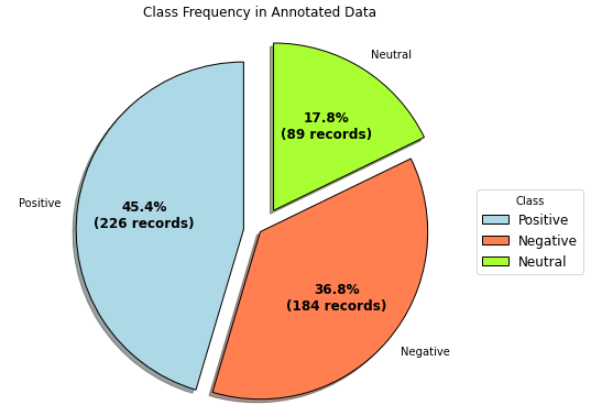

To convert the VADER compound scores into discrete classes, the scores were compared with the manual labels and the best possible thresholds were decided based on class separability. As shown in the figure below, class separability was poor, however, the threshold for positive was any score greater than 0; the threshold for negative was any score less than -0.1 and neutral was assigned to any scores in between these two thresholds.

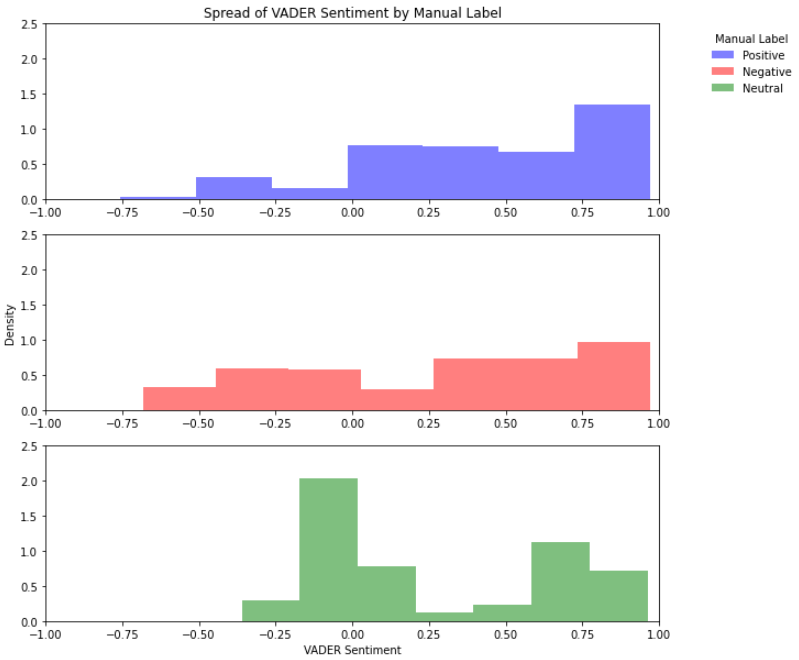

In order to train and make predictions using the ML models, feature extraction using Term Frequency-Inverse Document Frequency (TF-IDF) was used to convert the training and test data into normalised term frequency arrays. This normalised term frequency array, as opposed to a regular frequency array using Bag of Words (BoW), was specifically required for the LR and SVM models.

To optimise the hyperparameters and to avoid overfitting the ML models during training, *GridsearchCV* with a *Stratified K-Fold* strategy was implemented. This decision to use cross-validation over the use of a validation set meant that the small training set would not be reduced even further (Stack Exchange, 2019). Regularisation of the LR model was achieved using the L2 penalty as this was the only option supported for the 'multinomial' setting (Scikit Learn, 2021). Additionally, low 'C' parameters for the SVM model were investigated in order to soften the SVM margin and reduce overfitting (Scikit Learn, 2021). Moreover, a high 'alpha' setting was investigated for the NB model to reduce overfitting as well (Tadagoppula, 2020).

The multinomial NB model was found to be the best performing model. Thus, this model was saved with *pickle* for use in production. Further details on the model performances are included in the subsequent subsection.

The predictions from the sentiment analysis classifier were then used as scoring weights to the frequency of published news articles per state or territory. These scores were then plotted as a function of time to gain the necessary insights into the relative strengths of housing across all states and territories in Australia.

## Sentiment Analysis Performance Results

To assess the model performances, the precision, recall and macro F1-scores were analysed. As can be seen from the tables below, the LR model possessed the highest accuracy of 68%, followed by the NB model at 64%, the SVM model at 62% and the VADER model at 46%. The macro average F1-score was used for comparison instead of the accuracy as the dataset was slightly imbalanced.

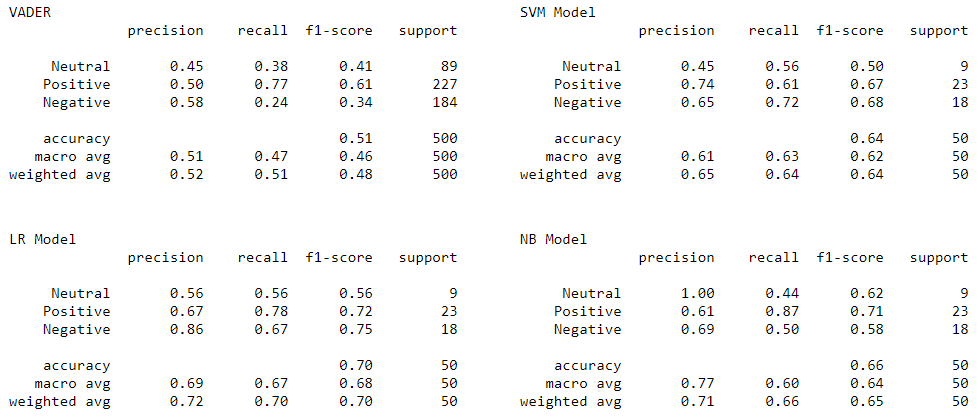

While the LR model was found to have the highest macro F1-score, it was excluded from selection because it displayed evidence of overfitting when comparing the k-fold macro F1-scores between the train and test data. That is, the macro F1-score in the training data was significantly higher than the macro F1-score in the test data.

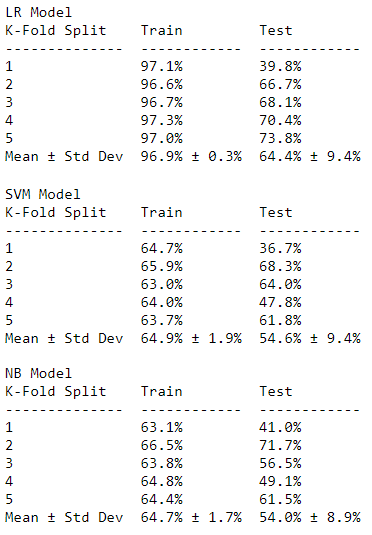

Consequently, the multinomial NB model was selected for use in production as it was the next most accurate model and did not show evidence of overfitting. The model's accuracy of 64% was also regarded as a good baseline to improve upon for future iterations of this NLP pipeline.

# High-Level Assessment of Results and Output

As can be seen from the figure below, the proposed NLP pipeline successfully provided an estimate of the relative strengths of the property market across all states and territories in Australia, as a function of time. The figure revealed that at the start of 2021, Victoria was the strongest property market in Australia, followed by NSW, ACT, QLD, WA, TAS, SA and then NT. Since the NLP task accuracies were not 100%, these sentiment scores require frequent checks and readjustments, using a separate and reliable source, to avoid errors from compounding over time.

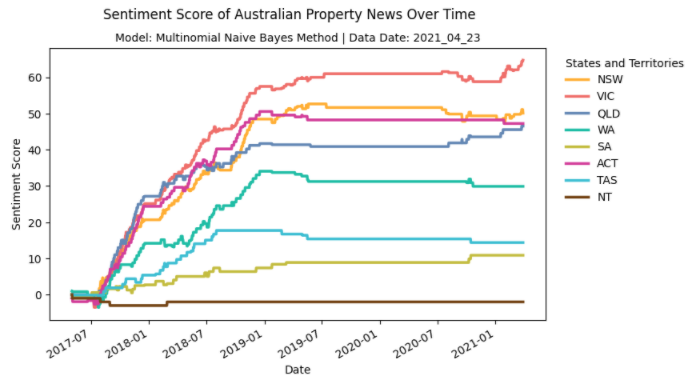

# References

(Chahira et al., 2017) - file:///C:/Users/Imran/Downloads/alldata_2017_6_20_96016.pdf

(GeeksforGeeks, 2020) - https://www.geeksforgeeks.org/rule-based-classifier-machine-learning/

(Thanaki, 2017) - Python Natural Language Processing By Jalaj Thanaki

(Li et al., 2020) - https://arxiv.org/pdf/1812.09449.pdf

(Rajasekharan, 2020) - https://towardsdatascience.com/unsupervised-ner-using-bert-2d7af5f90b8a

(Horev, 2018) - https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

(Li et al., 2019) - https://link.springer.com/chapter/10.1007/978-3-030-26072-9_25

(Toral, 2015) - https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.696.9771&rep=rep1&type=pdf

(Jack, 2019) - https://medium.com/@b.terryjack/nlp-pretrained-named-entity-recognition-7caa5cd28d7b

(Mahapatra, 2018) - https://towardsdatascience.com/why-deep-learning-is-needed-over-traditional-machine-learning-1b6a99177063#:~:text=The%20biggest%20advantage%20Deep%20Learning,and%20hard%20core%20feature%20extraction.

(Vilariño, 2020) - https://www.acclaro.com/blog/whats-new-in-data-anonymization-and-ner/

(Hui, 2019) - https://medium.com/nvidia-ai/how-to-scale-the-bert-training-with-nvidia-gpus-c1575e8eaf71#:~:text=For%20most%20of%20the%20fine,and%20later%20combine%20the%20results

(Devi, 2020) - https://www.researchgate.net/publication/341913399_Literature_Review_on_Sentiment_Analysis_in_Social_Media_Open_Challenges_toward_Applications

(Devika et al., 2016) - https://core.ac.uk/download/pdf/82425196.pdf

(Pajupuu, 2016) - https://www.researchgate.net/publication/303837298_Identifying_Polarity_in_Different_Text_Types

(Molla, 2018) - https://itnext.io/machine-learning-sentiment-analysis-of-movie-reviews-using-logisticregression-62e9622b4532

(Artiles, 2017) - https://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

(Isabelle et al., 2018) - file:///C:/Users/Imran/Downloads/55914818.pdf

(Heidenreich, 2018) - https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8

(Scikit Learn, 2021) - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

(Stack Exchange, 2019) - https://stats.stackexchange.com/questions/439485/how-to-evaluate-whether-model-is-overfitting-or-underfitting-when-using-cross-va

(Scikit Learn, 2021) - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

(Tadagoppula, 2020) - https://medium.com/analytics-vidhya/understanding-machine-learning-algorithms-naive-bayes-808ed649c1ec

(Brownle, 2020) - https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

# Natural Language Processing Pipeline Code

## Named Entity Recognition Model

### Identify Places

In [22]:
# import packages
import spacy # for NER
from spacy import displacy # for displaying NER results

# loading trained, enlighs NER model
nlp = spacy.load('en_core_web_sm') 

In [23]:
# import packages
import warnings # suppress warnings
warnings.filterwarnings('ignore') # suppress warnings
import pandas as pd # for creating dataframes
import re # use regex to perform acquisition of selective sentence

# loading trained NER model
nlp = spacy.load('en_core_web_sm') 

# read in csv saved previously
data2 = pd.read_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/data2.csv')

# define function for extracting geographical entities (GPE) and locations (LOC) using NER
def get_place_list(x):
    # apply nlp to news article
    article = nlp(x)
    # extract GPE entities from article
    place_list = [(X.text) for X in article.ents if (X.label_ == 'GPE') or (X.label_ == 'LOC')]
    # sort alphabetically and de-duplicate GPE list
    place_list = sorted(list(set(place_list)))
    return place_list
# apply function
data2['Place'] = data2['Body_Transformed'].apply(get_place_list)

# duplicate article for each GPE identified so sentimenet can be calculated per GPE
data2 = data2.explode('Place').reset_index(drop = True)

# select relevant sentences for each place
def get_sentences(place, text):
    # extract only the sentences containing the places
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    sentences_list = [word for word in sentences if str(place) in word]
    # use list comprehension convert list to string
    #sentences_string = ' '.join([str(elem) for elem in sentences_list])
    #return sentences_string
    return sentences_list
data2['Relevant_Body'] = data2.apply(lambda x: get_sentences(x['Place'], x['Body_Transformed']), axis=1)

# duplicate article for each GPE identified so sentimenet can be calculated per GPE
data2 = data2.explode('Relevant_Body').reset_index(drop = True)

### Get Additional Context for Sentences Containing Place Tags

In [24]:
# define function for extracting geographical entities (GPE) and locations (LOC) using NER
def get_additional_context(text, sentence):
    index = text.find(str(sentence))
    if index < 0:
        string = sentence
    else:
        start = index - 110
        end = index + len(str(sentence)) + 110
        if start <= 0:
            start = 0
            string = text[start:end]
            end_new = string.rfind(" ")
            string = string[start:end_new]
        else:
            start = start
            string = text[start:end]
            start_new = string.find(" ")
            end_new = string.rfind(" ")
            string = string[start_new:end_new]
    return string
# apply function
data2['Relevant_Body2'] = data2.apply(lambda x: get_additional_context(x['Body_Transformed'], x['Relevant_Body']), axis=1)

#example_text = data2['Body_Transformed'].iloc[102]
#displacy.render(nlp(example_text), jupyter=True, style='ent')

### Use Nominatim Software to get Full Address from Place Tags

In [25]:
# import packages
import time # for implementing time delays
from geopy.geocoders import Nominatim # for open-source geoencoding

# get unique values of geographical entities as repeated queries using Nominatim is not allowed per the usage policy
data2_unique = data2[['Place']].drop_duplicates(keep = 'first')
# specify user agent as per usage policy
geolocator = Nominatim(user_agent="geoapiExercises")

# define function to get the full address of Geographical Entity
def get_full_address(x):
    location = geolocator.geocode(x)
    # limit requests to 1 every 1 second as per usage policy
    time.sleep(1)
    try:
        address = location.address
    except:
        address = 'None'
    return address
# the line below is commented out to prevent running Nominatim for previously obtained locations as per usage policy
#data2_unique['Full_Address'] = data2_unique['Place'].apply(get_full_address)

# save addresses to csv (serves to cache the results so as to not repeat queries as per usage policy of Nominatim)
#data2_unique.to_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/standardised_addresses.csv', index = False)

### Roll-Up the Full Address to the State and Territory Level

In [26]:
# read in csv saved previously
standardised_addresses = pd.read_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/standardised_addresses.csv')

# merge full address to dataframe by the place variable
data3 = data2.merge(standardised_addresses, on = 'Place', how = 'left')

# identify state
def get_Key_Place(x):
    if ('Australia' in str(x)) and ('New South Wales' in str(x)):
        Key_Place = 'NSW'
    elif ('Australia' in str(x)) and ('Queensland' in str(x)):
        Key_Place = 'QLD'
    elif ('Australia' in str(x)) and ('South Australia' in str(x)):
        Key_Place = 'SA'
    elif ('Australia' in str(x)) and ('Tasmania' in str(x)):
        Key_Place = 'TAS'
    elif ('Australia' in str(x)) and ('Victoria' in str(x)):
        Key_Place = 'VIC'
    elif ('Australia' in str(x)) and ('Western Australia' in str(x)):
        Key_Place = 'WA'
    elif ('Australia' in str(x)) and ('Northern Territory' in str(x)):
        Key_Place = 'NT'
    elif ('Australia' in str(x)) and ('Australian Capital Territory' in str(x)):
        Key_Place = 'ACT'
    elif ('Australia' in str(x)):
        Key_Place = 'National'
    else:
        Key_Place = "Overseas"
    return Key_Place
data3['Place_Tag'] = data3['Full_Address'].apply(get_Key_Place)

### Assess Place Model Accuracy

In [27]:
def place_matched(Place_Tag, Tags_Transformed):
    if str(Tags_Transformed).find(str(Place_Tag)) >=0:
        return 'Matched'
    else:
        return 'No Match'

# apply function
data3['Place_Matched'] = data3.apply(lambda x: place_matched(x['Place_Tag'], x['Tags_Transformed']), axis=1)

# subset to only include labelled records
place_labelled = data3[data3['Tags_Transformed'].notna()]

# subset records to only include places which have been indexed by a state or territory
place_labelled = place_labelled[(place_labelled['Place_Tag'] != 'Overseas') & (place_labelled['Place_Tag'] != 'National')]

# compute accuracy
total = len(place_labelled)
matched = len(place_labelled[place_labelled['Place_Matched']=='Matched'])
Accuracy = matched/total
print("Place Model Accuracy:", "{0:.0%}".format(Accuracy))

Place Model Accuracy: 73%


## Sentiment Analysis

### Data Preprocessing Continued

In [28]:
# import packages
import nltk # import nltk for sentiment analysis
from nltk.stem import WordNetLemmatizer # for lemmatisation
from nltk.tokenize import word_tokenize # tokenize words for removal of stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer # detokenize text

# remove excess white space
data3['Body_Cleaned'] = data3['Relevant_Body2'].astype(str).apply(lambda x: ' '.join(x.split()))

# convert to lowercase
data3['Body_Cleaned'] = data3['Body_Cleaned'].str.lower()

# remove punctuation
data3['Body_Cleaned'] = data3['Body_Cleaned'].str.replace(r'[^\w\s]', '', regex = True)

# remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_tokenized_text = [word for word in word_tokens if word not in stopwords]
    filtered_text = TreebankWordDetokenizer().detokenize(filtered_tokenized_text)
    return filtered_text
data3['Body_Cleaned'] = data3['Body_Cleaned'].apply(lambda x: remove_stopwords(x))

# apply lemmatisation
lemmatizer = WordNetLemmatizer()
def apply_lemmatisation(text):
    word_tokens = word_tokenize(text)
    filtered_tokenized_text = [lemmatizer.lemmatize(w) for w in word_tokens]
    filtered_text = TreebankWordDetokenizer().detokenize(filtered_tokenized_text)
    return filtered_text
data3['Body_Cleaned'] = data3['Body_Cleaned'].apply(lambda x: apply_lemmatisation(x))

# remove numbers
data3['Body_Cleaned'] = data3['Body_Cleaned'].str.replace(r'\d+','', regex=True)

### Label Sample Dataset

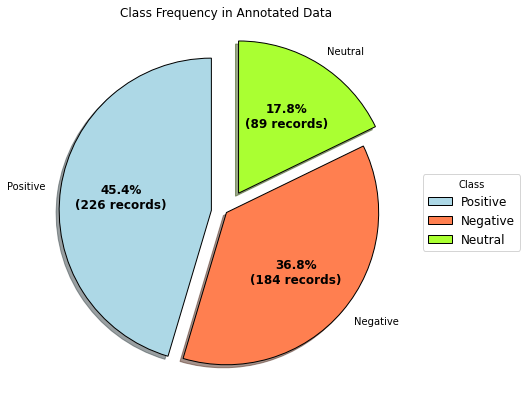

In [29]:
# import packages
import matplotlib.pyplot as plt # for plotting
from matplotlib.pyplot import figure # for plotting
import numpy as np

# save data to be labelled
data3.to_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/Unlabelled_Data.csv', index = True)

# read in csv saved previously
model_data  = pd.read_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/Annotated_Data.csv')

# plot pie chart of imbalanced dataset
Positive = len(model_data[model_data['Label']==1])
Negative = len(model_data[model_data['Label']==2])
Neutral = len(model_data[model_data['Label']==0])
Class = ['Positive', 'Negative', 'Neutral']
Data = [Positive, Negative, Neutral]
explode = (0.1, 0.0, 0.15)
colors = ("#ADD8E6", "#FF7F50", '#AAFF32')
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} records)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(Data, 
                                  autopct = lambda pct: func(pct, Data),
                                  explode = explode, 
                                  labels = Class,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, Class,
          title ="Class",
          loc ="center left",
          prop={"size":12},
          bbox_to_anchor = (1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Class Frequency in Annotated Data")
plt.show()

### Implementing a Valence Aware Dictionary and sEntiment Reasoner (VADER)

#### Acquiring Sentiment Scores

In [30]:
# import packages
from nltk.sentiment.vader import SentimentIntensityAnalyzer # import nltk for sentiment analysis
#nltk.download('vader_lexicon')

# call the SentimenetIntensityAnalyser object
analyser = SentimentIntensityAnalyzer()

# define function to return compound sentiment scores
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)['compound']
    return score

# get sentimenet for text
model_data['Body_Sentiment'] = model_data['Body_Cleaned'].apply(sentiment_analyzer_scores)

# subset dataframe to assess VADER accuracy
model_data = model_data[['Body_Cleaned', 'Label', 'Body_Sentiment']]

# subset to only include labelled records
model_data = model_data[model_data['Label'].notna()]

# data type conversion
model_data['Label'] = model_data['Label'].astype(int)

#### Converting VADER Sentiment Scores to Discrete Classes

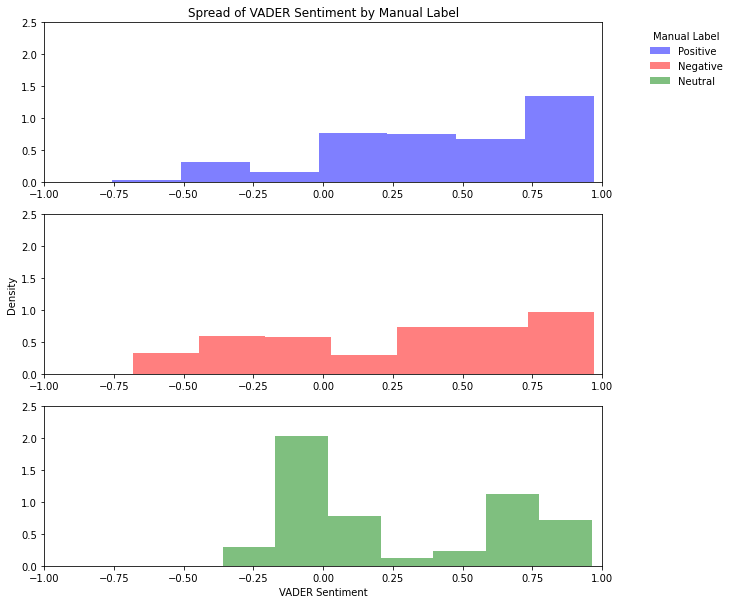

In [31]:
# define function to return compound sentiment scores
def get_Class(Label):
    if Label == 1:
        return 'Positive'
    if Label == 2:
        return 'Negative'
    else:
        return 'Neutral'

# get sentimenet for text
model_data['Class'] = model_data['Label'].apply(get_Class)

# set bins
bins = 7

# separate dataset into manual label classes
b1 = model_data[model_data['Class'] == 'Positive']
c1 = b1['Body_Sentiment']
b2 = model_data[model_data['Class'] == 'Negative']
c2 = b2['Body_Sentiment']
b3 = model_data[model_data['Class'] == 'Neutral']
c3 = b3['Body_Sentiment']

# define subplots
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# plot subplots
ax1.hist(c1, bins = bins, color="blue", alpha = 0.5, density = True)[0]
ax2.hist(c2, bins = bins, color="red", alpha = 0.5, density = True)[0]
ax3.hist(c3, bins = bins, color="green", alpha = 0.5, density = True)[0]

# set x and y limits
ax1.set_xlim(-1, 1)
ax1.set_ylim(0, 2.5)
ax2.set_xlim(-1, 1)
ax2.set_ylim(0, 2.5)
ax3.set_xlim(-1, 1)
ax3.set_ylim(0, 2.5)

# Set common labels
ax.set_xlabel('VADER Sentiment')
ax.set_ylabel('Density')
ax1.set_title('Spread of VADER Sentiment by Manual Label')

# Create the legend
line_labels = ["Positive", "Negative", "Neutral"]
fig.legend([ax1, ax2, ax3],
           labels = line_labels,
           loc="upper right",
           bbox_to_anchor = (1.08, 0.88),
           title = "Manual Label",
           frameon = False)

# show plot
plt.show()

In [32]:
# get VADER label
def get_VADER_label(i):
    if float(i) > 0:
        return 1
    elif float(i) >= -0.1 and float(i) <=0:
        return 0
    else:
        return 2

# get label from VADER sentiment
model_data['VADER Prediction'] = model_data['Body_Sentiment'].apply(get_VADER_label)

# data type conversion
model_data['VADER Prediction'] = model_data['VADER Prediction'].astype(int)

#### Assess the Precision and Recall of the VADER Model

In [33]:
# import packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, mean_squared_error # for analysing classification results

# assess results
target_names = ['Neutral', 'Positive', 'Negative']
print("VADER")
print(classification_report(model_data['Label'], model_data['VADER Prediction'], target_names = target_names))

VADER
              precision    recall  f1-score   support

     Neutral       0.45      0.38      0.41        89
    Positive       0.50      0.77      0.61       227
    Negative       0.58      0.24      0.34       184

    accuracy                           0.51       500
   macro avg       0.51      0.47      0.46       500
weighted avg       0.52      0.51      0.48       500



### Preparing Data for Training New Models

In [34]:
# import packages
from sklearn.feature_extraction.text import TfidfVectorizer # for generating TF-IDF matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score # for model assessment

# split training and test data
train, test = train_test_split(model_data[['Body_Cleaned', 'Label']], test_size = 0.1, stratify = model_data['Label'], random_state = 101)

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train['Body_Cleaned'])
test_vectors = vectorizer.transform(test['Body_Cleaned'])

### Implementing a Weighted, Multinomial Logistic Regression Model

#### Logistic Regression Model Hyperparamter Tuning

In [35]:
# import packages
from sklearn.linear_model import LogisticRegression # for logistic regression modelling
import pickle # for saving and loading best model from hyperparameter tuning
from tabulate import tabulate # for printing results in a tabular format

# define estimator
LR_estimator = LogisticRegression(multi_class = 'multinomial', 
                                  class_weight='balanced', 
                                  penalty = 'l2', 
                                  random_state = 101)

# define range of parameters to optimise the estimator
LR_parameters = {'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# define function for optimising the estimator estimator
def optimised_LR_model(estimator, parameters):
    grid_search = GridSearchCV(estimator= estimator, 
                               param_grid = parameters, 
                               scoring = 'f1_macro',
                               cv = 10,
                               return_train_score = True,
                               verbose=True)

    grid_search.fit(train_vectors, train['Label'])

    optimised_LR_model = grid_search.best_estimator_

    pickle.dump(optimised_LR_model, open('optimised_LR_model.sav', 'wb'))
    
    # print results to check for overfitting
    #print("params", grid_search.cv_results_["params"])
    #print("best_estimator_", optimised_LR_model)
    
    data = [
    ["1", 
     str(round(grid_search.cv_results_["split1_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split1_test_score"][-1]*100,1)) + '%'],
    ["2", 
     str(round(grid_search.cv_results_["split2_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split2_test_score"][-1]*100,1)) + '%'],
    ["3", 
     str(round(grid_search.cv_results_["split3_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split3_test_score"][-1]*100,1)) + '%'],
    ["4", 
     str(round(grid_search.cv_results_["split4_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split4_test_score"][-1]*100,1)) + '%'],
    ["5", 
     str(round(grid_search.cv_results_["split5_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split5_test_score"][-1]*100,1)) + '%'],
    ["Mean \u00B1 Std Dev", 
     str(round((grid_search.cv_results_["mean_train_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_train_score"][-1])*100,1)) + "%", 
     str(round((grid_search.cv_results_["mean_test_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_test_score"][-1])*100,1)) + "%"]] 
    #print(tabulate(data, headers=["Split", "Train", "Test"]))
    
    with open("LR_output.txt", "a") as LR_output:
        print(tabulate(data, headers=["K-Fold Split", "Train", "Test"]), file = LR_output)

## run function
#optimised_LR_model(LR_estimator, LR_parameters)
LR_output = open(r'C:/Users/Imran/Desktop/Assignment_3_Repo/LR_output.txt', "r")
print("LR Model")
print(LR_output.read())

LR Model
K-Fold Split    Train         Test
--------------  ------------  ------------
1               97.1%         39.8%
2               96.6%         66.7%
3               96.7%         68.1%
4               97.3%         70.4%
5               97.0%         73.8%
Mean ± Std Dev  96.9% ± 0.3%  64.4% ± 9.4%



#### Make Predictions using Logistic Regression Model

In [36]:
# load best estimator
optimised_LR_model = pickle.load(open('optimised_LR_model.sav', 'rb'))

# fit model for prediction making
optimised_LR_model.fit(train_vectors, train['Label'])

# make predictions
LR_y_pred = optimised_LR_model.predict(test_vectors)

#### Assess the Precision and Recall of the Logistic Regression Model

In [37]:
# assess results
target_names = ['Neutral', 'Positive', 'Negative']
print("LR Model")
print(classification_report(test['Label'], LR_y_pred, target_names = target_names))

LR Model
              precision    recall  f1-score   support

     Neutral       0.56      0.56      0.56         9
    Positive       0.67      0.78      0.72        23
    Negative       0.86      0.67      0.75        18

    accuracy                           0.70        50
   macro avg       0.69      0.67      0.68        50
weighted avg       0.72      0.70      0.70        50



### Implementing a Weighted, Multiclass Support Vector Machine Model

#### Support Vector Machine Model Hyperparamter Tuning

In [38]:
# import packages
from sklearn.multiclass import OneVsRestClassifier #for handling multiclass labels
from sklearn.svm import SVC # for support vector machine modelling

# define nested estimator
SVM_estimator = OneVsRestClassifier(SVC(class_weight='balanced', random_state = 101))

# define range of parameters to optimise the estimator
SVM_parameters = {'estimator__kernel': ['poly', 'rbf', 'sigmoid'],
                 'estimator__C': [0.1, 1, 1],
                 'estimator__gamma': [0.001, 0.01, 0.1]}

# define function for optimising the estimator estimator
def optimised_SVM_model(estimator, parameters):
    grid_search = GridSearchCV(estimator= estimator, 
                               param_grid = parameters, 
                               scoring = 'f1_macro',
                               cv = 10,
                               return_train_score = True,
                               verbose=True)

    grid_search.fit(train_vectors, train['Label'])

    optimised_SVM_model = grid_search.best_estimator_

    pickle.dump(optimised_SVM_model, open('optimised_SVM_model.sav', 'wb'))

    # print results to check for overfitting
    #print("params", grid_search.cv_results_["params"])
    #print("best_estimator_", optimised_SVM_model)
    
    data = [
    ["1", 
     str(round(grid_search.cv_results_["split1_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split1_test_score"][-1]*100,1)) + '%'],
    ["2", 
     str(round(grid_search.cv_results_["split2_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split2_test_score"][-1]*100,1)) + '%'],
    ["3", 
     str(round(grid_search.cv_results_["split3_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split3_test_score"][-1]*100,1)) + '%'],
    ["4", 
     str(round(grid_search.cv_results_["split4_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split4_test_score"][-1]*100,1)) + '%'],
    ["5", 
     str(round(grid_search.cv_results_["split5_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split5_test_score"][-1]*100,1)) + '%'],
    ["Mean \u00B1 Std Dev", 
     str(round((grid_search.cv_results_["mean_train_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_train_score"][-1])*100,1)) + "%", 
     str(round((grid_search.cv_results_["mean_test_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_test_score"][-1])*100,1)) + "%"]] 
    #print(tabulate(data, headers=["Split", "Train", "Test"]))
    
    with open("SVM_output.txt", "a") as SVM_output:
        print(tabulate(data, headers=["K-Fold Split", "Train", "Test"]), file = SVM_output)

## run function
#optimised_SVM_model(SVM_estimator, SVM_parameters)
SVM_output = open(r'C:/Users/Imran/Desktop/Assignment_3_Repo/SVM_output.txt', "r")
print("SVM Model")
print(SVM_output.read())

SVM Model
K-Fold Split    Train         Test
--------------  ------------  ------------
1               64.7%         36.7%
2               65.9%         68.3%
3               63.0%         64.0%
4               64.0%         47.8%
5               63.7%         61.8%
Mean ± Std Dev  64.9% ± 1.9%  54.6% ± 9.4%



#### Make Predictions using Support Vector Machine Model

In [39]:
# load best estimator
optimised_SVM_model = pickle.load(open('optimised_SVM_model.sav', 'rb'))

# fit model for prediction making
optimised_SVM_model.fit(train_vectors, train['Label'])

# make predictions
SVM_y_pred = optimised_SVM_model.predict(test_vectors)

#### Assess the Precision and Recall of the Support Vector Machine Model

In [40]:
# assess results
print("SVM Model")
print(classification_report(test['Label'], SVM_y_pred, target_names = target_names))

SVM Model
              precision    recall  f1-score   support

     Neutral       0.45      0.56      0.50         9
    Positive       0.74      0.61      0.67        23
    Negative       0.65      0.72      0.68        18

    accuracy                           0.64        50
   macro avg       0.61      0.63      0.62        50
weighted avg       0.65      0.64      0.64        50



### Implementing a Multinomial Naive Bayes Model

#### Multinomial Naive Bayes Model Hyperparamter Tuning

In [41]:
# import packages
from sklearn.naive_bayes import MultinomialNB # for multinomial naive bayes modelling

# define nested estimator
NB_estimator = OneVsRestClassifier(MultinomialNB())

# define range of parameters to optimise the estimator
NB_parameters = {'estimator__alpha': [0, 0.25, 0.5, 0.75, 1]}

# define function for optimising the estimator estimator
def optimised_NB_model(estimator, parameters):
    grid_search = GridSearchCV(estimator= estimator, 
                               param_grid = parameters, 
                               scoring = 'f1_macro',
                               cv = 10, 
                               return_train_score = True,
                               verbose=True)

    grid_search.fit(train_vectors, train['Label'])

    optimised_NB_model = grid_search.best_estimator_

    pickle.dump(optimised_NB_model, open('optimised_NB_model.sav', 'wb'))
    
    # print results to check for overfitting
    #print("params", grid_search.cv_results_["params"])
    #print("best_estimator_", optimised_NB_model)
    
    data = [
    ["1", 
     str(round(grid_search.cv_results_["split1_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split1_test_score"][-1]*100,1)) + '%'],
    ["2", 
     str(round(grid_search.cv_results_["split2_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split2_test_score"][-1]*100,1)) + '%'],
    ["3", 
     str(round(grid_search.cv_results_["split3_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split3_test_score"][-1]*100,1)) + '%'],
    ["4", 
     str(round(grid_search.cv_results_["split4_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split4_test_score"][-1]*100,1)) + '%'],
    ["5", 
     str(round(grid_search.cv_results_["split5_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split5_test_score"][-1]*100,1)) + '%'],
    ["Mean \u00B1 Std Dev", 
     str(round((grid_search.cv_results_["mean_train_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_train_score"][-1])*100,1)) + "%", 
     str(round((grid_search.cv_results_["mean_test_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_test_score"][-1])*100,1)) + "%"]] 
    #print(tabulate(data, headers=["Split", "Train", "Test"]))
    
    with open("NB_output.txt", "a") as NB_output:
        print(tabulate(data, headers=["K-Fold Split", "Train", "Test"]), file = NB_output)

## run function
#optimised_NB_model(NB_estimator, NB_parameters)
NB_output = open(r'C:/Users/Imran/Desktop/Assignment_3_Repo/NB_output.txt', "r")
print("NB Model")
print(NB_output.read())

NB Model
K-Fold Split    Train         Test
--------------  ------------  ------------
1               63.1%         41.0%
2               66.5%         71.7%
3               63.8%         56.5%
4               64.8%         49.1%
5               64.4%         61.5%
Mean ± Std Dev  64.7% ± 1.7%  54.0% ± 8.9%



#### Make Predictions using Multinomial Naive Bayes Model

In [42]:
# load best estimator
optimised_NB_model = pickle.load(open('optimised_NB_model.sav', 'rb'))

# fit model for prediction making
optimised_NB_model.fit(train_vectors, train['Label'])

# make predictions
NB_y_pred = optimised_NB_model.predict(test_vectors)

#### Assess the Precision and Recall of the Multinomial Naive Bayes Model

In [43]:
# assess results
print("NB Model")
print(classification_report(test['Label'], NB_y_pred, target_names = target_names))

NB Model
              precision    recall  f1-score   support

     Neutral       1.00      0.44      0.62         9
    Positive       0.61      0.87      0.71        23
    Negative       0.69      0.50      0.58        18

    accuracy                           0.66        50
   macro avg       0.77      0.60      0.64        50
weighted avg       0.71      0.66      0.65        50



## Analysis

### Data Processing

In [44]:
# create new dataframe
data4 = data3

# transform all records using previously fitted vectorizer
data_vectors = vectorizer.transform(data4['Body_Cleaned'])

# make predictions
y_pred = optimised_NB_model.predict(data_vectors)

# change to dataframe
y_pred = pd.DataFrame(y_pred, columns = ['Pred'])

# join predictions to dataframe
data4 = pd.concat([data4, y_pred], axis=1)

# define baseline count
data4['Count'] = 1

# weight counts by label
def get_weights(i):
    if str(i) == "1":
        return 1
    elif str(i) == "2":
        return -1
    else:
        return 0
data4['Weight'] = data4['Pred'].apply(get_weights)

# calculate sentiment score from best model
data4['Sentiment_Score'] = data4.Count * data4.Weight

# make new dataset
data5 = data4

# convert the 'Date' column to datetime format
data5['Date_Transformed'] = data5['Date_Transformed'].astype('datetime64[ns]')

# subset columns of dataframe and the data into key places
data5_NSW = data5[data5['Place_Tag'] == 'NSW'][['Date_Transformed', 'Sentiment_Score']]
data5_QLD = data5[data5['Place_Tag'] == 'QLD'][['Date_Transformed', 'Sentiment_Score']]
data5_SA = data5[data5['Place_Tag'] == 'SA'][['Date_Transformed', 'Sentiment_Score']]
data5_TAS = data5[data5['Place_Tag'] == 'TAS'][['Date_Transformed', 'Sentiment_Score']]
data5_VIC = data5[data5['Place_Tag'] == 'VIC'][['Date_Transformed', 'Sentiment_Score']]
data5_WA = data5[data5['Place_Tag'] == 'WA'][['Date_Transformed', 'Sentiment_Score']]
data5_NT = data5[data5['Place_Tag'] == 'NT'][['Date_Transformed', 'Sentiment_Score']]
data5_ACT = data5[data5['Place_Tag'] == 'ACT'][['Date_Transformed', 'Sentiment_Score']]

# group by date in a regular format
data5_NSW = data5_NSW.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_QLD = data5_QLD.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_SA = data5_SA.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_TAS = data5_TAS.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_VIC = data5_VIC.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_WA = data5_WA.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_NT = data5_NT.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_ACT = data5_ACT.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()

# sort dataframe by date to compute cumulative compound sentiment scores over time
data5_NSW = data5_NSW.sort_values(by = 'Date_Transformed', ascending = True)
data5_QLD = data5_QLD.sort_values(by = 'Date_Transformed', ascending = True)
data5_SA = data5_SA.sort_values(by = 'Date_Transformed', ascending = True)
data5_TAS = data5_TAS.sort_values(by = 'Date_Transformed', ascending = True)
data5_VIC = data5_VIC.sort_values(by = 'Date_Transformed', ascending = True)
data5_WA = data5_WA.sort_values(by = 'Date_Transformed', ascending = True)
data5_NT = data5_NT.sort_values(by = 'Date_Transformed', ascending = True)
data5_ACT = data5_ACT.sort_values(by = 'Date_Transformed', ascending = True)

# missing value imputation
data5_NSW = data5_NSW.fillna(0.0)
data5_QLD = data5_QLD.fillna(0.0)
data5_SA = data5_SA.fillna(0.0)
data5_TAS = data5_TAS.fillna(0.0)
data5_VIC = data5_VIC.fillna(0.0)
data5_WA = data5_WA.fillna(0.0)
data5_NT = data5_NT.fillna(0.0)
data5_ACT = data5_ACT.fillna(0.0)

# merge dataframes together
data5 = pd.concat([data5_NSW, data5_QLD, data5_SA, data5_TAS, data5_VIC, data5_WA, data5_NT, data5_ACT], axis = 1)

# rename columns
data5.columns = ['Sentiment_Score_NSW', 'Sentiment_Score_QLD', 'Sentiment_Score_SA', 'Sentiment_Score_TAS',
                'Sentiment_Score_VIC', 'Sentiment_Score_WA', 'Sentiment_Score_NT', 'Sentiment_Score_ACT']

# missing value imputation for body sentiment after merge for missing weeks
data5 = data5.fillna(0.0)

### Plot Cumulative Sums of Compound Sentiments over Time

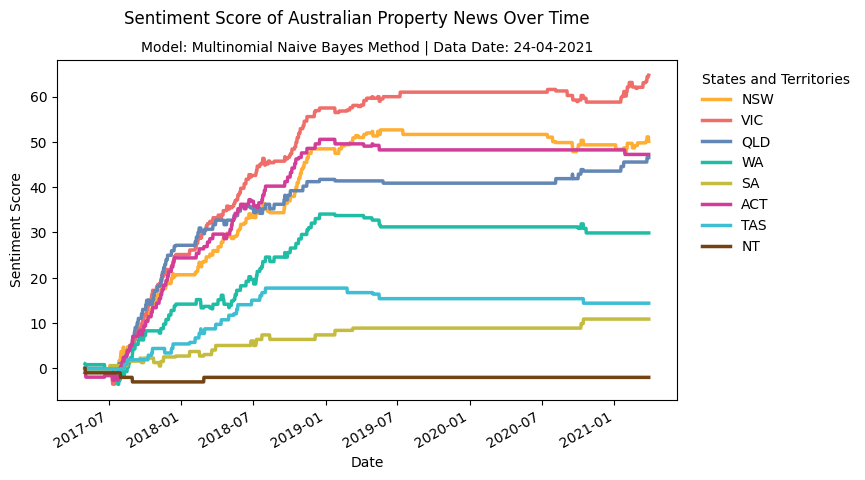

In [45]:
# specify start date
start_date = '2016-01-01'
# specify end date
end_date = '2021-12-01'

# define function for calculating cumulative sums
def plot_cumulative_sum(data5, start_date, end_date):
    
    # put in start date caps
    if pd.to_datetime(start_date) < data5.index[0]:
        start_date = data5.index[0]
    else:
        start_date = start_date
        
    # put in end date caps
    if pd.to_datetime(end_date) > data5.index[-1]:
        end_date = data5.index[-1]
    else:
        end_date = end_date
        
    # filter dataframe on dates
    data6 = data5.loc[start_date:end_date]

    # calculate cumulative sums of compound sentiment over time
    data6['Body_Cumulative_NSW'] = data6['Sentiment_Score_NSW'].cumsum()
    data6['Body_Cumulative_QLD'] = data6['Sentiment_Score_QLD'].cumsum()
    data6['Body_Cumulative_SA'] = data6['Sentiment_Score_SA'].cumsum()
    data6['Body_Cumulative_TAS'] = data6['Sentiment_Score_TAS'].cumsum()
    data6['Body_Cumulative_VIC'] = data6['Sentiment_Score_VIC'].cumsum()
    data6['Body_Cumulative_WA'] = data6['Sentiment_Score_WA'].cumsum()
    data6['Body_Cumulative_NT'] = data6['Sentiment_Score_NT'].cumsum()
    data6['Body_Cumulative_ACT'] = data6['Sentiment_Score_ACT'].cumsum()

    # missing value imputation at the state level for missing weeks
    data6 = data6.fillna(method='ffill')
    
    # specify fig size and dpi
    figure(figsize=(8, 5), dpi=100)

    # make up some data
    x = data6.index
    y1 = data6['Body_Cumulative_NSW']
    y2 = data6['Body_Cumulative_VIC']
    y3 = data6['Body_Cumulative_QLD']
    y4 = data6['Body_Cumulative_WA']
    y5 = data6['Body_Cumulative_SA']
    y6 = data6['Body_Cumulative_ACT']
    y7 = data6['Body_Cumulative_TAS']
    y8 = data6['Body_Cumulative_NT']

    # plot
    plt.plot(x, y1, linewidth = 2.5, color = '#ffae34', label = 'NSW')
    plt.plot(x, y2, linewidth = 2.5, color = '#ef6e6a', label = 'VIC')
    plt.plot(x, y3, linewidth = 2.5, color = '#6387b4', label = 'QLD')
    plt.plot(x, y4, linewidth = 2.5, color = '#1fbda5', label = 'WA')
    plt.plot(x, y5, linewidth = 2.5, color = '#c3bc3f', label = 'SA')
    plt.plot(x, y6, linewidth = 2.5, color = '#d23d99', label = 'ACT')
    plt.plot(x, y7, linewidth = 2.5, color = '#3dbed2', label = 'TAS')
    plt.plot(x, y8, linewidth = 2.5, color = '#734314', label = 'NT')

    # beautify the x-labels
    plt.gcf().autofmt_xdate()

    # set title
    Data_Date = data2['Data_Date'].iloc[0]
    plt.title('Model: Multinomial Naive Bayes Method | Data Date: {}'.format(Data_Date), fontsize = 10)
    plt.suptitle('Sentiment Score of Australian Property News Over Time', fontsize = 12)
    
    # control tick frequency
    #plt.yticks(np.arange(0, 100, 20))

    # change font size
    plt.xlabel('Date', fontsize = 10)
    plt.ylabel('Sentiment Score', fontsize = 10)
    
    # set legend
    leg = plt.legend(loc="upper right", bbox_to_anchor = (1.3, 1), title = 'States and Territories', frameon = False)
    leg._legend_box.align = "left"
    
    # control tick frequency
    #plt.yticks(np.arange(0, 100, 20))

    # change font size
    plt.xlabel('Date', fontsize = 10)
    plt.ylabel('Sentiment Score', fontsize = 10)
    
    # show plot
    plt.show()
    
# call the function
plot_cumulative_sum(data5, start_date, end_date)